<a href="https://colab.research.google.com/github/ctarrington/data-science-hw/blob/master/kalman-filters/rlabbe/rlabbe_02_discrete_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math

import numpy as np
from scipy.ndimage import convolve1d

from matplotlib.pyplot import bar, plot
from matplotlib import pyplot as plt

from ipywidgets import fixed, interact
import ipywidgets as widgets

In [2]:
def plot_discrete_distribution(heights, title = ''):
  buckets = range(len(heights))
  bar(buckets, heights)
  plt.title(title)
  plt.show()

In [3]:
def move_discrete(heights, steps, uncertainty_kernel):
  moved = np.roll(heights, steps)
  blurred = convolve1d(moved, uncertainty_kernel, mode='wrap')
  return blurred


In [4]:
def normalize_discrete(heights):
  sum = np.sum(heights)
  return heights / sum

In [5]:
def likelihood_hallway(hallway, z_door, confidence):
  try:
    scale = confidence / (1.-confidence)
  except ZeroDivisionError:
    scale = 1e8

  lh = np.ones(len(hallway))
  lh[hallway == z_door] *= scale
  return lh

In [6]:
flat_belief = np.array([1/10]*10)  # no clue where the thing is
hallway = np.array([1,1, 0,0,0,0,0,0, 1, 0])  # doors at positions 0,1 and 8
move_uncertainty_kernel = np.array([0.1, 0.8, 0.1])


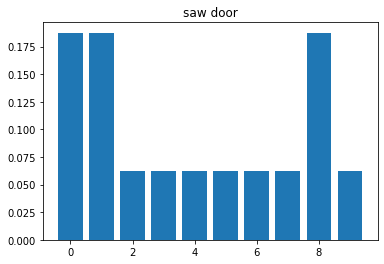

In [7]:
likelihood_saw_door = likelihood_hallway(hallway, 1, 0.75)
likelihood_saw_walls = likelihood_hallway(hallway, 0, 0.75)
posterior = normalize_discrete(likelihood_saw_door * flat_belief)
plot_discrete_distribution(posterior, 'saw door')

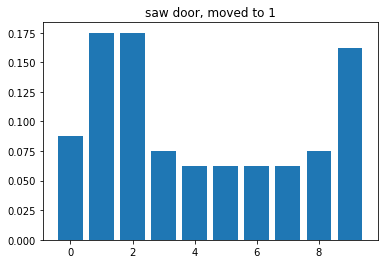

In [8]:
moved = move_discrete(posterior, 1, move_uncertainty_kernel)
plot_discrete_distribution(moved, 'saw door, moved to 1')

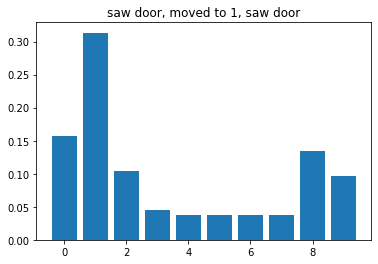

In [9]:
posterior = normalize_discrete(likelihood_saw_door * moved)
plot_discrete_distribution(posterior, 'saw door, moved to 1, saw door')

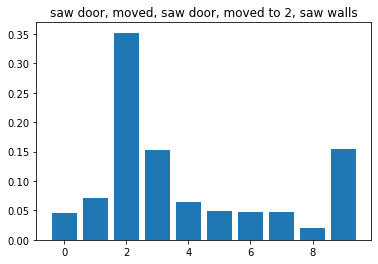

In [10]:
moved = move_discrete(posterior, 1, move_uncertainty_kernel)
posterior = normalize_discrete(likelihood_saw_walls*moved)
plot_discrete_distribution(posterior, 'saw door, moved, saw door, moved to 2, saw walls')

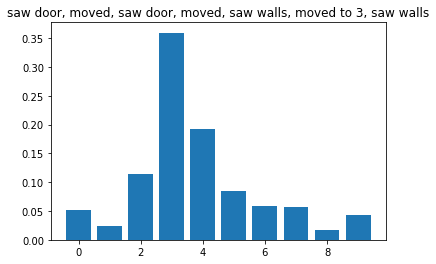

In [11]:
moved = move_discrete(posterior, 1, move_uncertainty_kernel)
posterior = normalize_discrete(likelihood_saw_walls*moved)
plot_discrete_distribution(posterior, 'saw door, moved, saw door, moved, saw walls, moved to 3, saw walls')


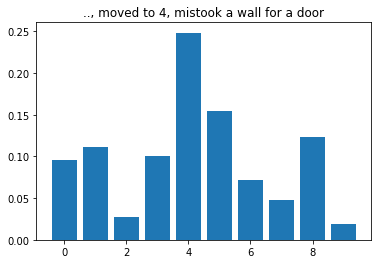

In [12]:
moved = move_discrete(posterior, 1, move_uncertainty_kernel)
posterior = normalize_discrete(likelihood_saw_door*moved)
plot_discrete_distribution(posterior, '.., moved to 4, mistook a wall for a door')

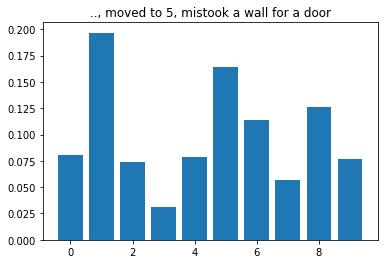

In [13]:
moved = move_discrete(posterior, 1, move_uncertainty_kernel)
posterior = normalize_discrete(likelihood_saw_door*moved)
plot_discrete_distribution(posterior, '.., moved to 5, mistook a wall for a door')

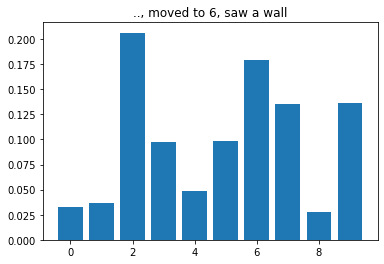

In [14]:
moved = move_discrete(posterior, 1, move_uncertainty_kernel)
posterior = normalize_discrete(likelihood_saw_walls*moved)
plot_discrete_distribution(posterior, '.., moved to 6, saw a wall')

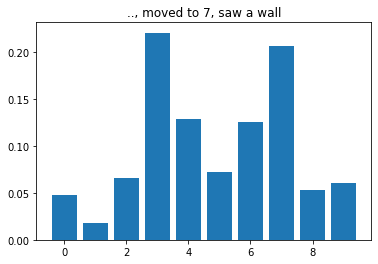

In [15]:
moved = move_discrete(posterior, 1, move_uncertainty_kernel)
posterior = normalize_discrete(likelihood_saw_walls*moved)
plot_discrete_distribution(posterior, '.., moved to 7, saw a wall')

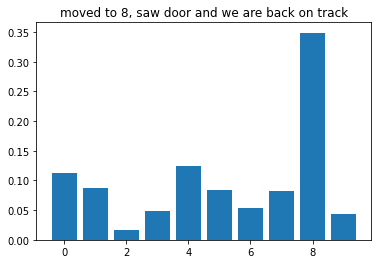

In [16]:
moved = move_discrete(posterior, 1, move_uncertainty_kernel)
posterior = normalize_discrete(likelihood_saw_door*moved)
plot_discrete_distribution(posterior, 'moved to 8, saw door and we are back on track')

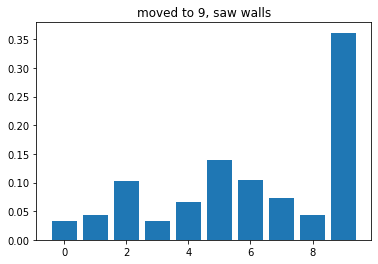

In [17]:
moved = move_discrete(posterior, 1, move_uncertainty_kernel)
posterior = normalize_discrete(likelihood_saw_walls*moved)
plot_discrete_distribution(posterior, 'moved to 9, saw walls')


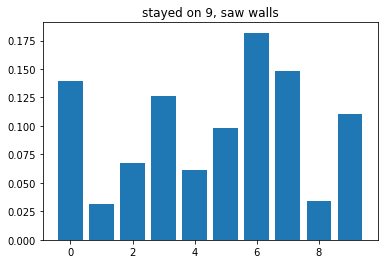

In [18]:
moved = move_discrete(posterior, 1, move_uncertainty_kernel) # predicted a move / asked for a move but didn't get one
posterior = normalize_discrete(likelihood_saw_walls*moved)
plot_discrete_distribution(posterior, 'stayed on 9, saw walls')


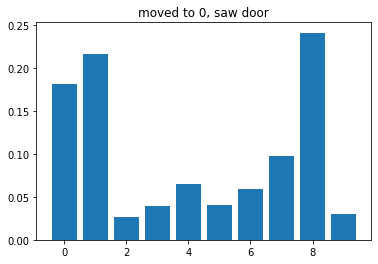

In [19]:
moved = move_discrete(posterior, 1, move_uncertainty_kernel) 
posterior = normalize_discrete(likelihood_saw_door*moved)
plot_discrete_distribution(posterior, 'moved to 0, saw door')

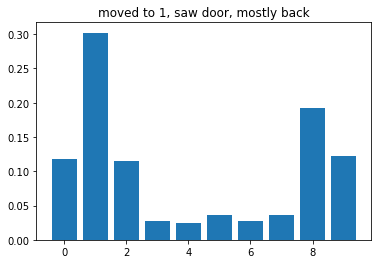

In [20]:
moved = move_discrete(posterior, 1, move_uncertainty_kernel) 
posterior = normalize_discrete(likelihood_saw_door*moved)
plot_discrete_distribution(posterior, 'moved to 1, saw door, mostly back')

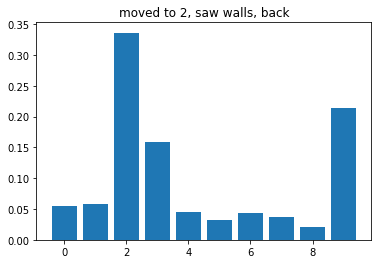

In [21]:
moved = move_discrete(posterior, 1, move_uncertainty_kernel) 
posterior = normalize_discrete(likelihood_saw_walls*moved)
plot_discrete_distribution(posterior, 'moved to 2, saw walls, back')

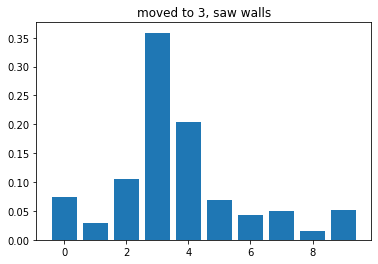

In [22]:
moved = move_discrete(posterior, 1, move_uncertainty_kernel) 
posterior = normalize_discrete(likelihood_saw_walls*moved)
plot_discrete_distribution(posterior, 'moved to 3, saw walls')
